## 4장 신경망 학습
- 학습이란 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것을 뜻한다.
- 신경망이 학습할 수 있도록 해주는 지표인 __손실함수__는 결괏값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 학습의 목표이다.

## 1.1 데이터에서 학습
- 신경망의 특징은 데이터를 보고 학습할 수 있다는 점이다.
- 데이터에서 학습한다는 것은 __가중치 매개변수의 값을 데이터를 보고 자동으로 결정__한다는 뜻이다.

## 1.2 데이터 주도 학습
- 기계학습은 __데이터가 생명__이다.
- 데이터에서 답을 찾고 데이터에서 패턴을 발견하고 데이터로 이야기를 만드는, 그것이 바로 기계학습이다.
> - 보통 패던을 찾을때 사람이 이것저것 생각하고 답을 찾는 것이 일반적이지만 사람의 개입이 들어가기마련이다. 하지만 기계학습에서는 사람의 개입을 최소화하고 수집한 데이터로부터 패턴을 찾으려 시도한다.
- 기계학습에서 모아진 데이터로부터 규칙을 찾아내는 역할을 __기계__가 담당한다.
> - 하지만 데이터의 특징을 벡터화 할때 여전히 __사람__이 설계하는 것임을 주의해야한다.
> - 즉, 설계를 잘못하면 기계학습을 해도 좋은 결과를 얻지 못한다는 점이다.
- 반면 신경망은 있는 그대로를 학습한다.
> - 즉, MNIST를 예로 하면 기존의 기계학습은 이미지 데이터를 설계할때 여전히 사람의 개입이 들어가지만 신경망을 이미지에 포함된 중요한 특징까지도 __기계__가 스스로 학습한다.
- 신경망의 이점은 모든 문제를 같은 맥락에서 풀 수 있다는 점이다.
> - 예를 들어 '5'를 인식하는 문제든, '개'를 인식하는 문제든 '사람얼굴'을 인식하는 문제든 세부사항과 관계없이 신경망은 주어진 데이터를 온전히 학습하고, 주어진 문제의 패턴을 발견하려고 시도한다.

## 1.3 훈련 데이터와 시험 데이터
- 기계학습 문제는 데이터를 훈련 데이터와 시험 데이터로 나눠 학습과 실험을 수행하는 것이 일반적이다.
> - 아직 보지 못한 데이터로도 문제를 올바르게 풀어내기 위해 훈련 데이터로 데이터를 학습 시키고 시험 데이터를 통해 보지 못한 데이터가 들어와도 올바르게 예측하는지를 확인한다.
- 따라서 데이터셋에만 지나치게 최적화된 상태 즉, 오버피팅을 피하기는 기계학습에서 중요한 과제이다.

## 2.1손실함수
- 신경망 학습에서는 현재의 상태를 하나의 지표로 표현하는데 그 지표를 가장 좋게 만들어주는 가중치 매개변수의 값을 탐색하는 것이 목표이다. 그 지표를 손실 함수(loss function)이라 한다.
> - 일반적으로 이 손실함수는 평균 제곱 오차와 교차 엔트로피 오차를 사용한다.

## 2.2 평균 제곱 오차
- 가장 많이 쓰이는 손실 함수는 평균 제곱 오차(MSE) 이다.
![test](./img/MSE.png)

In [1]:
import numpy as np

In [2]:
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0] # 2번째 index로 예측
t = [0,0,1,0,0,0,0,0,0,0] # 2 번째 index

In [3]:
def mean_squared_error(y,t):
    return 0.5 * np.sum((y-t)**2)

In [4]:
mean_squared_error(np.array(y),np.array(t)) # MSE = 0.0975

0.09750000000000003

In [5]:
y = [0.1,0.05,0.0,0.0,0.05,0.1,0.6,0.1,0.0,0.0] # 6번째 index로 예측

In [6]:
mean_squared_error(np.array(y),np.array(t)) # MSE = 0.6975

0.6975

- 즉, 평균 제곱 오차를 기준으로 옳바르게 예측을 할수록 MSE값이 작아짐을 알 수 있다.
---------

## 2.3 교차 엔트로피 오차
- 또 다른 손실 함수로서 교차 엔트로피 오차도 자주 이용한다.
![test](./img/교차엔트로피오차.png)
- log는 밑이 e인 자연로그이다. y(k)는 신경말의 출력, t(k)는 정답레이블이다.
- 실질적으로 정답일 때의 추정 t(k)가 1일때만 자연로그의 계산식이 된다. 
> - 즉, 교차 엔트로피 오차는 정답일 때의 출력이 전체 값을 정하게 된다.

In [7]:
def cross_entropy_error(y,t):
    delta = 1e-7 # log0이 되는 것을 방지
    return -np.sum(t*np.log(y+delta))

In [8]:
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0] # 2번째 index로 예측
t = [0,0,1,0,0,0,0,0,0,0] # 2번째 index

In [9]:
cross_entropy_error(np.array(y),np.array(t)) # -log0.6 = 0.5108..

0.510825457099338

In [10]:
y = [0.1,0.05,0.0,0.0,0.05,0.1,0.6,0.1,0.0,0.0] # 6번째 index로 예측

In [11]:
cross_entropy_error(np.array(y),np.array(t)) # -log0.0

16.11809565095832

- 평균 제곱의 오차의 판단과 일치

## 2.4 미니배치 학습
- 훈련 데이터에 대한 손실 함수의 값을 구하고, 그 값을 최대한 줄여주는 매개변수를 찾아낸다.
> - 모든 훈련 데이터를 대상으로 손실 함수 값을 구해야 한다.
> - 즉, 100개의 데이터가 있으면 100개의 손실 함수 값들의 합을 지표로 삼는다.

![test](./img/엔트로피.png)

- t(nk)는 n번째 데이터의 k번째 값을 의미
- 마지막에 N으로 나누어 정규화를 한다. 즉, 평균 손실 함수를 구한다.
> - 이렇게 평균을 구해 사용하면 훈련 데이터의 갯수와 상관없이 통일된 지표를 얻을 수 있다.
- 데이터가 수백만 수천만으로 넘어가게 되면 데이터 하나하나의 손실함수를 구하는데는 당연히 시간이 오래걸릴 수 밖에 없다. 이런 경우 데이터 일부를 추려 전체의 __근사치__로 이용하는데 이렇게 훈련 데이터로부터 일부만 골라 학습을 하는 것을 미니배치라고 한다.

In [12]:
import sys,os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

In [13]:
(X_train,t_train), (X_test,t_test) = load_mnist(normalize=True,one_hot_label=True)

In [14]:
print(X_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [15]:
train_size = X_train.shape[0] # shape 형상의 첫번째 인덱스 즉, 60,000
batch_size = 10
batch_mask = np.random.choice(train_size,batch_size) 
# 0 ~ train_size 사이의 데이터를 batch_size의 수 만큼 뽑는다.
X_batch = X_train[batch_mask] # 해당 index의 행을 추출
t_batch = t_train[batch_mask]

## 2.5 (배치용) 교차엔트로피 오차 구현

In [16]:
def cross_entropy_error(y,t):
    if y.dim == 1: # y가 1차원이라면,
        t = t.reshape(1,t.size) 
        # 데이터 하나당 교차 엔트로피 오차를 구하는 경우 데이터의 형상을 바꿔준다. 
        y = y.reshape(1,y.size) 
    batch_size = y.shape[0] # 훈련데이터의 행 데이터의 수를 batch_size로 지정
    return -np.sum(t*np.log(y+1e-7)) / batchsize # 엔트로피 오차의 평균을 계산

In [36]:
def cross_entropy_error_no_ont_hot(y,t):
    if y.dim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y_size)
        
    batch_size = y.shape[0] 
    return -np.sum(np.log(y[np.arange(batch_size),t]+1e-7)) / batch_size

- np.log(y[np.arange(batch_size),t])
> - np.arange 0 ~ batch_size - 1 까지의 배열 생성
> - t에는 실제 레이블이 저장되어있으므로 예를들어 [2,7,0,9,4]와 같이 저장
> - 즉, y[0,2],y[1,7],y[2,0],.., 같이 저장
- 이 구현의 핵심은 정답에 해당하는 신경망의 출력만으로 교차 엔트로피 오차를 계산한다는 점이다.

## 2.6 손실함수를 사용하는 이유
- 신경망 학습에서는 최적의 매개변수(가중치와 편향)을 탐색할 때 손실 함수의 값을 가능한 한 작게 하는 매개변수를 찾는다. 
- 이때, 매개변수의 미분을 계산하고, 그 미분 값을 단서로 매개변수의 값을 서서히 갱신하는 과정을 반복한다.
> - 즉, 가중치 매개변수의 값을 아주 조금 변화시켰을 때, 손실 함수가 어떻게 변하는지를 주목한다.
> - 만약 미분 값이 음수이면 양의 방향으로 변화시켜 손실 함수의 값을 줄이고 미분 값이 양수이면 음의 방향으로 변화시켜 손실 함수의 값을 줄일 수 있다.
> - 따라서 위와 같은 방법으로 매개변수를 조정하다보면 미분값이 0에 매우 가까워지면서 어느쪽으로 움직여도 손실 함수의 값이 달라지지 않으면서 갱신은 거기서 멈추게 된다.
- 따라서 계단함수를 활성화 함수로 사용하지 않는 이유도 대부분에서 미분을 했을때 0 이므로 손실 함수를 지표로 삼는 게 아무 의미가 없어진다.
- 계단 함수는 한순간만 변화를 일으키지만, 시그모이드 함수이 미분(접선)은 연속적으로 변하고 곡선의 기울기도 연속적으로 변한다. 즉, 시그모이드 함수의 미분은 어느 장소라도 0이 되지 않는다.

## 3.1 수치미분
- 경사법에서는 기울기 (경사) 값을 기준으로 나아갈 방향을 정한다. 
- 미분은 '특정 순간'의 변화량을 뜻한다. 따라서 한순간의 변화량을 얻기 위한 목적이다.
![test](./img/미분.png)
- 결국 x의 __작은변화__가 함수 f(X)를 얼마나 변화시키느냐를 의미한다.
> - 즉, 시간을 뜻하는 h를 한없이 0에 가깝게 한다는 의미를 limit h가 0으로 간다는 것을 나타낸다.

![test](./img/차분2.png)
- (x+h)와 x 사이의 함수 f의 차분을 계산하고 있지만, 애당초 이 계산에는 오차가 있다는 사실을 주의해야한다.
- '진정한 미분'은 x위치의 함수의 기울기(접선)에 해당하지만, (x+h)와 x 사이의 기울기에 해당 하는 근사로 구한 접선과 차이가 크다. 
- 따라서 이 오차를 줄이기 위해 (x+h)와 (x-h)일 때의 함수 f의 차분을 계산하는 방법을 쓰기도 한다.
> - 이 차분은 x를 중심으로 그 전후의 차분을 계산한다는 의미에서 중심 차분 혹은 중앙 차분이라 한다.

In [37]:
def numerical_diff(f,x): # f 함수 / x 인수
    h = 1e-4 # 0.0001
    return (f(x+h)-f(x-h)) / (2*h)

In [38]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [39]:
import numpy as np
import matplotlib.pylab as plt

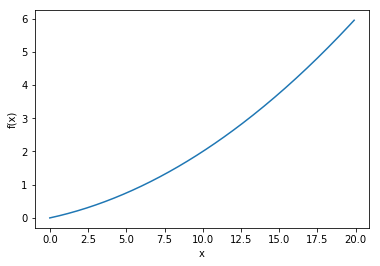

In [40]:
x = np.arange(0.0,20.0,0.1)
y = function_1(x)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x,y)
plt.show()

In [41]:
numerical_diff(function_1,5) # X = 5 일때 미분 값

0.1999999999990898

In [42]:
numerical_diff(function_1,10)

0.2999999999986347

- 이렇게 계산한 미분 값이 x에 대한 f(x)의 변화량이다. 즉, 함수의 기울기에 해당
------

## 3.2 편미분
- f(x0,x1) = Xo^2 + x1^2
> - 변수가 2개라는 점을 유의
![test](./img/편미분그래프.png)
- 이와 같이 변수가 여럿인 함수에 대한 미분을 편미분이라 한다.
- 편미분은 변수가 하나인 미분과 마찬가지로 특정 장소의 기울기를 구한다. 단, 여러 변수 중 목표 변수 하나에 초점을 맞추고 다른 변수는 값을 고정한다.

In [43]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [46]:
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성(원소는 모두 0)
    
    for idx in range(x.size): # x의 원소 개수만큼 반복
        tmp_val = x[idx] # x의 각 원소를 tmp_val에 할당
        x[idx] = tmp_val + h # 각 원소에 0.0001의 미세한 값을 더한다.
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h
        fxh2 = f(x) # f(x-h)
        
        grad[idx] = (fxh1 - fxh2) / (2*h) # 미분을 하고 각 grad 원소에 할당
        x[idx] = tmp_val # 값 복원
        
    return grad

In [47]:
numerical_gradient(function_2,np.array([3.0,4.0]))

array([6., 8.])

In [48]:
numerical_gradient(function_2,np.array([0.0,2.0]))

array([0., 4.])

In [49]:
numerical_gradient(function_2,np.array([3.0,0.0]))

array([6., 0.])

- 이처럼 (X0,X1)의 각 점에서의 기울기를 계산할 수 있다.
> - 앞의 코드에서 보면 점 (3,4)의 기울기는 (6,8)

![test](./img/기울기.png)
- 이 그림을 보면 기울기는 함수의 '가장 낮은 장소(최솟값)'를 가르킨다.
> - 더 정확히 말하면 기울기가 가르키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향이다.

## 3.3 경사법(경사하강법)
- 기계학습 문제 대부분은 학습 단계에서 최적의 매개변수를 찾아낸다.
> - 신경망 역시 최적의 매개변수 (가중치와 편향)을 학습 시에 찾아야 한다.
> - 즉, 손실 함수가 최솟값이 될 때의 매개변수의 값이다.
- 매개변수 공간이 광대하여 어디가 최솟값이 되는 곳인지를 짐작할 수 없지만 기울기를 잘 이용해 함수의 최솟값을 찾으려는 것이 경사법이다.
> - 그러나 기울기가 가리키는 곳에 정말 함수의 최솟값이 있는지, 즉 그쪽이 정말로 나아갈 방향인지는 보장할 수 없다. 실제로 복잡한 함수에서는 기울기가 가리키는 방향에 최솟값이 없는 경우가 대부분이다.
>> - 즉, 기울기가 0이 되는 지점이 한정된 범위에서의 최솟값일 수도 안정점일 수도 있다. 
- 기울어진 방향이 꼭 최솟값을 가리키는 것은 아니나, 그 방향으로 가야 함수의 값을 줄일 수 있다.
- 경사법은 현 위치에서 기울어진 방향으로 일정 거리만큼 이동한다. 그런 다음 이동한 곳에서도 마찬가지로 기울기를 구하고, 또 기울어진 방향으로 나아가는 것을 반복하는데 이렇게 함수의 값을 점차 줄이는 것이 경사법이다.

![test](./img/경사하강법.jpg)
- 여기서 r은 갱신하는 양을 나타낸다. 신경망에서는 이를 학습률(learning rate)라 한다.
> - 한 번의 학습으로 얼마만큼 학습해야 할지, 즉 매개변수 값을 얼마나 갱신하느냐를 정하는 것이 학습률이다.

In [50]:
def gradient_descent(f,init_x,lr=0.01,step_num=100): 
    # f: 함수식 , init_x: 인수 , lr: 학습률, step_num: 반복 수
    x = init_x # x_data
    
    for i in range(step_num): # 100번 반복
        grad = numerical_gradient(f,x) # 편미분 즉, 기울기
        x -= lr * grad # x - 학습률*해당 기울기 
    return x

In [51]:
init_x = np.array([-3.0,4.0]) # x_data
gradient_descent(function_2,init_x=init_x,lr=0.1,step_num=100)
# 함수식: y = x[0]^2+x[1]^2 , X0 = -3.0, X1 = 4.0 일때의 기울기 
# 학습률: 0.1 , 반복 수 100 (기울기의 이동을 100번 반복)
# 해당 기울기 : (0,0) 에 매우 근접
# 실제로 위 함수식을 최소로 하는 값은 (0,0) 이다. 

array([-6.11110793e-10,  8.14814391e-10])

- 갱신과정 
![test](./img/갱신과정.png)
- 학습률이 너무 크면 큰 값으로 발산해버리고 반대로 너무 작으면 거의 갱신되지 않은 채 중간에 끝나버린다.
- 학습률 같은 매개변수를 하이퍼파라미터라고 하는데 신경망의 매개변수는 알고리즘에 의해서 __자동__으로 갱신되는 반면 하이퍼파라미터는 __사람이 직접 설정__해야하는 매개변수이다.

## 3.4 신경망에서의 기울기
- 신경망학습에서도 기울기를 구해야 하는데 여기서 말하는 기울기는 가중치 매개변수에 대한 손실 함수의 기울기이다.
- 가중치의 각 원소를 편미분하여 각 원소들이 조금 변경했을 때 손실 함수가 얼마나 변화하느냐를 나타낸다.

In [71]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # 분자 분모 양쪽에 입력값의 최대 값을 빼준다. 결과는 같다.
    sum_exp_a = np.sum(exp_a) # 오버플로 대책
    y = exp_a / sum_exp_a
    return y
def cross_entropy_error(y,t):
    delta = 1e-7 # log0이 되는 것을 방지
    return -np.sum(t*np.log(y+delta))
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 값 복원
        it.iternext()   
        
    return grad

In [72]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) 
        # 2X3의 행렬을 정규분포로 초기화 즉, 가중치 값을 랜덤값으로 초기화
    def predict(self,x):
        return np.dot(x,self.W) # h(x) = XW (예측값을 출력)
    def loss(self,x,t):
        z = self.predict(x) # 인수 x_data predict (예측값 할당)
        y = softmax(z) # 출력층 설계 (softmax)
        loss = cross_entropy_error(y,t) # 손실함수 계산
        
        return loss

In [73]:
net = simpleNet()

In [74]:
print(net.W) # 랜덤한 가중치 값들

[[ 0.26629005 -1.15725025  0.18250316]
 [-0.97135901  0.93764986  1.52842581]]


In [75]:
x = np.array([0.6,0.9])
p = net.predict(x)
print(p) # 예측 값

[-0.71444908  0.14953472  1.48508513]


In [76]:
np.argmax(p) # 최댓값 인덱스 추출

2

In [77]:
t = np.array([0,0,1]) # 정답 레이블

In [78]:
net.loss(x,t) # 엔트로피 오차가 작은 것을 알 수 있다.

0.3176300942085533

In [79]:
def f(W): # 인수 W
    return net.loss(x,t) # 0.3176
# f = lambda w: net.loss(x,t) 로 써도 됨

- 여기서 정의한 f(W) 함수의 인수 W는 더미(dummy)로 만든 것이다.

In [80]:
dW = numerical_gradient(f,net.W) # loss 값이 0.3176 일때의 가중치 W (2x3)을 편미분
print(dW) # 편미분된 값

[[ 0.04841284  0.11486401 -0.16327685]
 [ 0.07261926  0.17229601 -0.24491527]]


- W11의 값은 대략 0.05인데 이 말은 즉, W11을 h만큼 늘리면 손실함수의 값은 0.05h만큼 증가한다는 의미이다.
- 그래서 손실 함수를 줄인다는 관점에서는 w11은 음의방향으로 w13은 양의 방향으로 갱신해야 함을 알 수 있다.

## 4.1 학습 알고리즘 구현
- 전제
> - 신경망에는 적응 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 __학습__이라 한다.
- 1. 미니배치
> - 훈련 데이터 중 일부를 가져오고 선별된 미니배치의 손실 함수 값을 줄이는 것이 목표이다.
- 2. 기울기 산출
> - 손실 함수를 줄이기 위해 각가중치 매개변수의 기울기를 구한다. 
- 3. 매개변수 갱신
> - 가중치 매개변수를 기울기 방향으로 아주 조금 갱신한다.
- 4. 반복
> - 1 ~ 3단계를 반복한다.

__데이터를 미니배치로 무작위로 선정하기 때문에 확률적 경사 하강법(SGD)라 부른다.__

## 4.2 2층 신경망 클래스 구현

In [82]:
import sys,os
sys.path.append(os.pardir)
def sigmoid(x):
    return 1/(1+np.exp(-x)) 
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # 분자 분모 양쪽에 입력값의 최대 값을 빼준다. 결과는 같다.
    sum_exp_a = np.sum(exp_a) # 오버플로 대책
    y = exp_a / sum_exp_a
    return y
def cross_entropy_error(y,t):
    delta = 1e-7 # log0이 되는 것을 방지
    return -np.sum(t*np.log(y+delta))
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 값 복원
        it.iternext()   
        
    return grad

In [95]:
class TwoLayerNet:
    def __init__(self,input_size,hidden_size,output_size,weight_init_std=0.01):
        # __init__ 클래스를 초기화 (초기화 메서드는 클래스를 생성할 때 불리는 메서드이다.)
        # input_size: 입력층 노드 설정
        # hidden_size: 은닉층 노드 설정
        # output_size: 출력층 노드 설정
        # weight_init_std: 학습률
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size,hidden_size)
        self.params['b1'] = np.zeros(hidden_size) # 편향은 0으로 초기화
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size,output_size)
        self.params['b2'] = np.zeros(output_size)
        # params: 딕셔너리 변수
        # 신경망의 매개변수(W,b)를 보관
        # 매개변수를 랜덤값으로 초기화 하고 학습률을 곱한다.
        # np.zeros(hidden_size) 은닉층 노드의 갯수만큼 1차원 원소 생성
        
    def predict(self,x):
        W1,W2 = self.params['W1'], self.params['W2']
        b1,b2 = self.params['b1'], self.params['b2']
        # 딕셔너리 변수에 보관된 매개변수들을 각 변수에 할당
        
        a1 = np.dot(x,W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1,W2) + b2
        y = softmax(a2)
        # 층에서 층으로 신호 전달 (즉, 연산)
        return y
    
    def loss(self,x,t):
        y = self.predict(x) # 예측값
        
        return cross_entropy_error(y,t) # 엔트로피 오차 계산 즉, loss값 return
    
    def accuracy(self,x,t):
        y = self.predict(x) # 예측값
        y = np.argmax(y,axis=1)
        t = np.argmax(t,axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0]) # 정확도 계산
        return accuracy
    
    def numerical_gradient(self,x,t):
        loss_W  = lambda W: self.loss(x,t) # loss 값 할당
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W,self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W,self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W,self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W,self.params['b2'])
        # 각 매개변수의 편미분(기울기)을 구해서 grads변수에 보관
        
        return grads #return
        
        

In [87]:
net = TwoLayerNet(input_size=784, hidden_size=100,output_size=10)

In [90]:
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


- TwoLayerNet 클래스는 딕셔너리인 params와 grads를 인스턴스 변수로 갖는다.
- params 변수에는 이 신경망에 필요한 매개변수가 모두 저장

In [91]:
x = np.random.rand(100,784) # x_data 100,784 즉, 100개의 데이터 784개의 특성을 지님
y = net.predict(x)

In [92]:
y

array([[0.00100185, 0.00102833, 0.00105191, 0.00099501, 0.00108478,
        0.00098234, 0.001053  , 0.00096194, 0.00094275, 0.00089434],
       [0.00100588, 0.00102729, 0.00105604, 0.00099692, 0.00109099,
        0.00098168, 0.00104923, 0.00096294, 0.00094166, 0.00089309],
       [0.00100606, 0.00102912, 0.00105743, 0.00099613, 0.00108851,
        0.00098444, 0.00105285, 0.00095963, 0.00094134, 0.0008941 ],
       [0.00100417, 0.00103073, 0.00105369, 0.0009948 , 0.00108816,
        0.00098111, 0.00104874, 0.0009631 , 0.00094131, 0.00089417],
       [0.00100409, 0.00103051, 0.00105515, 0.0009958 , 0.0010888 ,
        0.00098411, 0.00104951, 0.00095916, 0.00093852, 0.00089496],
       [0.00100499, 0.00102994, 0.00105107, 0.00100009, 0.00109062,
        0.00098233, 0.00105173, 0.00096589, 0.00094093, 0.00088936],
       [0.00100296, 0.00102716, 0.00105476, 0.00099905, 0.00108979,
        0.00098374, 0.00105227, 0.00096216, 0.00094032, 0.00089118],
       [0.00100621, 0.00102922, 0.0010530

In [93]:
x = np.random.rand(100,784)
t = np.random.rand(100,10)

grads = net.numerical_gradient(x,t)

In [94]:
print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape) # 각 매개변수의 기울기

(784, 100)
(100,)
(100, 10)
(10,)


## 4.3 미니배치 학습 구현하기


In [96]:
import numpy as np
from dataset.mnist import load_mnist

(x_train,y_train), (x_test,y_test) = load_mnist(normalize=True,one_hot_label=True)

train_loss_list = [] # 손실 함수 값을 담을 list

# 하이퍼 파라미터
iters_num = 10000 # 반복 횟수
train_size = x_train.shape[0] # train_size
batch_size = 100 # 미니배치 크기
learning_rate = 0.1 # learning rate

network = TwoLayerNet(input_size=784,hidden_size=50,output_size=10) 

In [ ]:
for i in range(iters_num): # 10,000번 반복
    batch_mask = np.random.choice(train_size,batch_size) 
    # batch_size만큼 훈련 셋에서 인덱스 추출
    x_batch = x_train[batch_mask] # 인덱스 번호에 있는 데이터 할당
    t_batch = t_train[batch_mask] 
    
    grad = network.numerical_gradient(x_batch,t_batch) # 기울기 계산
    
    for key in ('W1','b1','W2','b2'): # 매개변수 갱신
        network.params[key] -= learning_rate * grad[key] # x - 기울기*학습률
        
    loss = network.loss(x_batch,t_batch) # loss 값 계산
    train_loss_list.append(loss) # loss 값 리스트에 추가
    

- 매번 60,000개의 데이터 중 임의로 100개의 데이터를 추려내고 확률적 경사하강법을 진행하여 매개변수를 갱신
- 학습 횟구가 늘어가면서 손실 함수의 값이 줄어든다.
> - 이는 학습이 잘 되고 있다는 뜻으로, 신경망의 가중치 매개변수가 서서히 데이터에 적응하고 있음을 의미한다.

## 시험 데이터로 평가
- 범용 능력을 평가하기 위해 훈련데이터에 포함되지 않은 데이터를 사용해 평가한다.
- 이를 위해 학습도중 정기적으로 훈련 데이터와 시험 데이터를 대상으로 정확도를 기록한다.
> - 여기에서는 1에폭별로 훈련 데이터와 시험 데이터에 대한 정확도를 기록
>> - 1에폭은 학습에서 훈련 데이터를 모두 소진했을 때의 횟수에 해당한다.
>> - 예를들어 10,000개의 데이터를 100개씩 미니배치 할 경우 SGD하강법을 100회 반복하면 모든 훈련 데이터를 소진한게 되는데 이 경우 100회가 1에폭이 된다.

In [97]:
import numpy as np
from dataset.mnist import load_mnist

(x_train,y_train), (x_test,y_test) = load_mnist(normalize=True,one_hot_label=True)

train_loss_list = [] # 손실 함수 값을 담을 list
train_acc_list = [] # train 정확도 값을 담을 list
test_acc_list = [] # test 정확도 값을 담을 list

iter_per_epoch = max(train_size/batch_size,1) 
# 1에폭 당 반복 수 : 600

# 하이퍼 파라미터
iters_num = 10000 # 반복 횟수
train_size = x_train.shape[0] # train_size
batch_size = 100 # 미니배치 크기
learning_rate = 0.1 # learning rate

network = TwoLayerNet(input_size=784,hidden_size=50,output_size=10) 

In [ ]:
for i in range(iters_num): # 10,000번 반복
    batch_mask = np.random.choice(train_size,batch_size) 
    # batch_size만큼 훈련 셋에서 인덱스 추출
    x_batch = x_train[batch_mask] # 인덱스 번호에 있는 데이터 할당
    t_batch = t_train[batch_mask] 
    
    grad = network.numerical_gradient(x_batch,t_batch) # 기울기 계산
    
    for key in ('W1','b1','W2','b2'): # 매개변수 갱신
        network.params[key] -= learning_rate * grad[key] # x - 기울기*학습률
        
    loss = network.loss(x_batch,t_batch) # loss 값 계산
    train_loss_list.append(loss) # loss 값 리스트에 추가
    
    if i % iter_per_epoch == 0: 
        # 1epoch 당 (매개변수가 1epoch 동안 조정)
        train_acc = network.accuracy(x_train,t_train) # train 정확도
        test_acc = network.accuracy(x_test,t_test) # test 정확도
        train_acc_list.append(train_acc) # 리스트에 추가
        test_acc_list.append(test_acc) # 리스트에 추가
        print("train acc, test acc = " + str(train_acc) + ',' + str(test_acc))

train acc, test acc =0.10441666666666667,0.1028


- 1epoch 마다 모든 훈련 데이터와 시험 데이터에 대한 정확도를 계산하고, 그 결과를 기록한다.
- 에폭이 진행될수록(학습이 진행될수록) 훈련 데이터와 시험 데이터를 사용하고 평가한 정확도가 좋아지고 있다. 또, 두 정확도에는 차이가 거의 없음을 알 수 있다. 즉, 오버피팅이 일어나지 않았다.